- Caltech101 이미지를 학습시켜 이미지 인식을 구현해보도록 한다.
- chair/image_0016.jpg 이미지와 유사한 이미지를 검색한다.

In [1]:
from PIL import Image
import numpy as np
import os, re

In [2]:
# 파일경로
search_dir = '../images/101_ObjectCategories/'
cache_dir  = '../images/cache_avhash'

In [3]:
# 캐시폴더 만들기
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)

In [4]:
# 이미지 데이터를 hash로 변환하는 함수
def average_hash(fname, size = 16):
    fname2 = fname[len(search_dir):]
    # 캐시파일이 저장될 경로를 생성한다.
    # 폴더명_파일명.csv로 저장
    cache_file = cache_dir+ '/' + fname2[:].replace('/','_') + ' .csv'
    
    # 캐시 파일이 없다면 생성한다
    if not os.path.exists(cache_file):
        # 이미지 데이터를 읽어와 2진 데이터를 생성한다,
        img = Image.open(fname)
        img = img.convert('L')
        img = img.resize((size, size), Image.ANTIALIAS)
        pixels = np.array(img.getdata()).reshape((size, size))
        avg = pixels.mean()
        px = 1 * (pixels > avg)
        
        # 생성된 데이터를 파일로 저장한다.
        np.savetxt(cache_file, px, fmt='%.0f', delimiter=',')
         
    # 캐시 파일이 있다면 읽어온다
    else:
        px = np.loadtxt(cache_file, delimiter=',')
    return px

In [5]:
# 해밍 거리 구하기
# 해밍 거리 : 같은 문자 수를 가진 2개의 문자열에서 대응하는 위치에 이쓴 ㄴ문자 중
# 다른 것의 개수를 나타낸다.
def haming_dist(a,b):
    # 1차원 배열로 반환
    aa = a.reshape(1, -1)
    bb = b.reshape(1, -1)
    
    # 해밍거리를 계산
    dist = (aa != bb).sum()
    return dist

In [6]:
# 모든 폴더에 처리할 수 있도록 폴더 순회
def enum_all_files(path):
    # 모든 파일들의 경로를 가져온다.
    for root, dirs, files in os.walk(path):
        for f in files:
            fname = os.path.join(root,f)
            
            # 이미지 파일인 경우에만 반환한다.
            # .jpg, .jpeg, .png로 끝나는 경우
            if re.search(r'\.(jpg|jpeg|png)$', fname):
                yield fname 

In [7]:
# 이미지 찾는 함수
def find_image(fname, rate):
    # 해당 파일의 평균 해시값을 가져온다.
    src = average_hash(fname)
    
    # 모든 파일을 탐색한다.
    for fname2 in enum_all_files(search_dir):
        # 경로에 윈도우식이 있다면 리눅스 식으로 변경해준다.
        fname2 = fname2.replace('\\','/')
        # print(fname2)
        # 다른 파일들도 캐시를 읽어온다.
        dst = average_hash(fname2)
        
        # 원본과 다른 이미지들간의 해밍거리를 구한다. (0 ~ 1 사이의 값이 나오게)
        diff_r = haming_dist(src, dst) / 256
        
        # 해밍거리가 작다는 원본이랑 유사
        if diff_r < rate:
            yield (diff_r, fname2) # yield는 반환값을 리스트와 유사한 형태로 출력

In [8]:
find_list = list(find_image(search_dir + '/chair/image_0016.jpg', 0.25))

In [9]:
# 찾은 이미지들을 그려본다.
import matplotlib. pyplot as plt

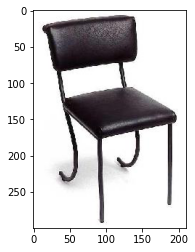

In [10]:
# 원본을 그린다.
a1 = Image.open(search_dir + '/chair/image_0016.jpg')
plt.imshow(a1)
plt.show()

오차값 : 0.23828125


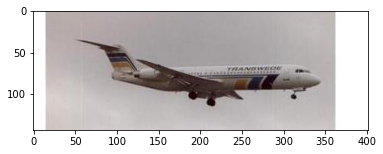

오차값 : 0.22265625


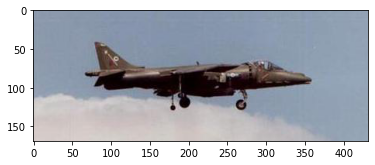

오차값 : 0.24609375


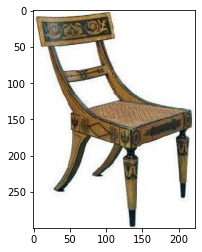

오차값 : 0.0


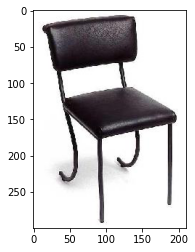

오차값 : 0.2265625


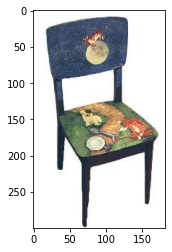

오차값 : 0.24609375


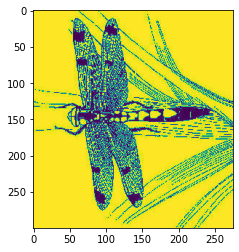

오차값 : 0.2265625


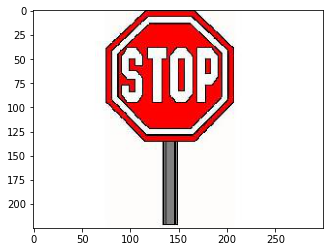

오차값 : 0.234375


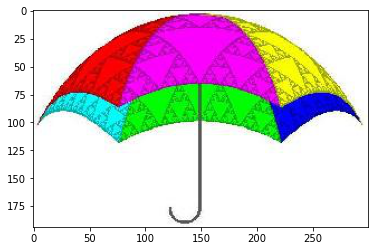

In [15]:
# 검색된 이미지를 시각화한다.
for rate, fname in find_list:
    print(f'오차값 : {rate}')
    a1 = Image.open(fname)
    plt.imshow(a1)
    plt.show()